In [1]:
# Necessary Libraries for Data Exploration
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Constant Variable
BOOKS_DATASET_PATH = "./dataset/books.csv"

In [3]:
# Dataset Setup for Data Exploration
books_dataset = pd.read_csv(BOOKS_DATASET_PATH)

In [4]:
# Dataset Overview
books_dataset.head(10)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780002005883,0002005883,Gilead,NaN,Marilynne Robinson,Fiction,http://books.google.com/books/content?id=KQZCP...,A NOVEL THAT READERS and critics have been eag...,2004.0,3.85,247.0,361.0
1,9780002261982,0002261987,Spider's Web,A Novel,Charles Osborne;Agatha Christie,Detective and mystery stories,http://books.google.com/books/content?id=gA5GP...,A new 'Christie for Christmas' -- a full-lengt...,2000.0,3.83,241.0,5164.0
2,9780006163831,0006163831,The One Tree,NaN,Stephen R. Donaldson,American fiction,http://books.google.com/books/content?id=OmQaw...,Volume Two of Stephen Donaldson's acclaimed se...,1982.0,3.97,479.0,172.0
3,9780006178736,0006178731,Rage of angels,NaN,Sidney Sheldon,Fiction,http://books.google.com/books/content?id=FKo2T...,"A memorable, mesmerizing heroine Jennifer -- b...",1993.0,3.93,512.0,29532.0
4,9780006280897,0006280897,The Four Loves,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=XhQ5X...,Lewis' work on the nature of love divides love...,2002.0,4.15,170.0,33684.0
5,9780006280934,0006280935,The Problem of Pain,NaN,Clive Staples Lewis,Christian life,http://books.google.com/books/content?id=Kk-uV...,"""In The Problem of Pain, C.S. Lewis, one of th...",2002.0,4.09,176.0,37569.0
6,9780006353287,0006353282,An Autobiography,NaN,Agatha Christie,"Authors, English",http://books.google.com/books/content?id=c49GQ...,Donation.,1977.0,4.27,560.0,3975.0
7,9780006380832,0006380832,Empires of the Monsoon,A History of the Indian Ocean and Its Invaders,Richard Hall,"Africa, East",http://books.google.com/books/content?id=MuPEQ...,Until Vasco da Gama discovered the sea-route t...,1998.0,4.41,608.0,65.0
8,9780006470229,000647022X,The Gap Into Madness,Chaos and Order,Stephen R. Donaldson,"Hyland, Morn (Fictitious character)",http://books.google.com/books/content?id=4oXav...,A new-cover reissue of the fourth book in the ...,1994.0,4.15,743.0,103.0
9,9780006472612,0006472613,Master of the Game,NaN,Sidney Sheldon,Adventure stories,http://books.google.com/books/content?id=TkTYp...,Kate Blackwell is an enigma and one of the mos...,1982.0,4.11,489.0,43540.0


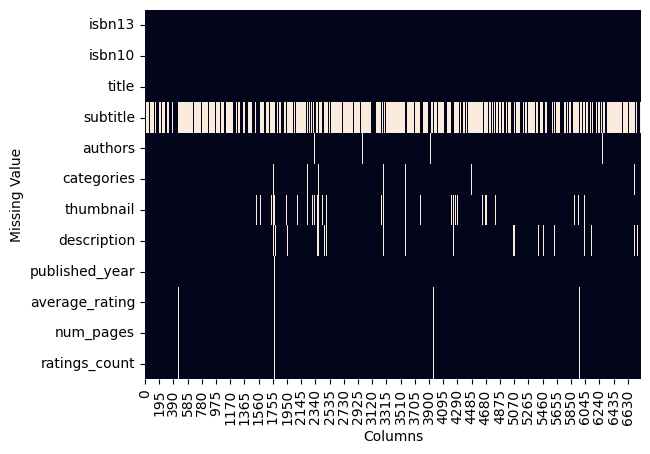

In [5]:
# Plot the Heatmap to Visualise Missing Value (NaN)
ax = plt.axes()
sns.heatmap(books_dataset.isna().transpose(), cbar = False, ax = ax)

# Set the Title & Labels
plt.xlabel("Columns")
plt.ylabel("Missing Value")

plt.show()

In [6]:
# Indicate the Missing Description of Books
books_dataset["missing_description"] = np.where(books_dataset["description"].isna(), 1, 0)

# Calculate the Year of Book Publication
books_dataset["age_of_book"] = 2025 - books_dataset["published_year"]

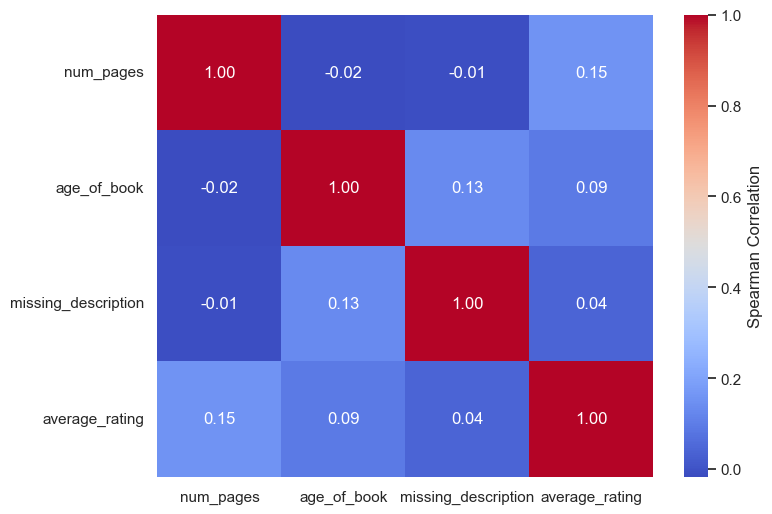

In [7]:
# Plot a Correlation Heatmap
plt.figure(figsize = (8, 6))

# Calculate the Correlation Matrix
corr_matrix = books_dataset[["num_pages", "age_of_book", "missing_description", "average_rating"]].corr(method = "spearman")

sns.set_theme(style = "white")
sns.heatmap(corr_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", cbar_kws = {"label": "Spearman Correlation"})

plt.show()

In [8]:
# Display the Records that consists of Missing Values for Following Columns: Description, Num Pages, Average Rating, and Published Year
books_dataset[(books_dataset["description"].isna()) | (books_dataset["num_pages"].isna()) | (books_dataset["average_rating"].isna()) | (books_dataset["published_year"].isna())]

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
37,9780006906018,000690601X,The Princess of the Chalet School,NaN,Elinor Mary Brent-Dyer,Juvenile Fiction,http://books.google.com/books/content?id=EJcQP...,NaN,2000.0,4.10,159.0,446.0,1,25.0
60,9780007127740,000712774X,The illustrated man,NaN,Ray Bradbury,Fiction,http://books.google.com/books/content?id=kePql...,NaN,2002.0,4.14,186.0,56781.0,1,23.0
99,9780020442806,0020442807,"The Chronicles of Narnia: Lion, the witch and ...",NaN,Clive Staples Lewis,Fairy tales,NaN,NaN,1978.0,4.26,1425.0,1446.0,1,47.0
102,9780023513206,0023513209,Reason in History,A General Introduction to the Philosophy of Hi...,Georg Wilhelm Friedrich Hegel,Philosophy,http://books.google.com/books/content?id=BCvcY...,NaN,1953.0,3.64,95.0,430.0,1,72.0
105,9780026995016,0026995018,Spandau,The Secret Diaries,Albert Speer,History,NaN,NaN,1976.0,4.12,463.0,6.0,1,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6787,9783464371640,3464371646,About a Boy,NaN,Nick Hornby,NaN,http://books.google.com/books/content?id=PuDYw...,NaN,2002.0,3.80,256.0,155.0,1,23.0
6788,9783540292128,3540292128,Enzyme-Catalyzed Synthesis of Polymers,NaN,Shiro Kobayashi;Helmut Ritter;David Kaplan,Science,http://books.google.com/books/content?id=WXOym...,NaN,2006.0,0.00,254.0,0.0,1,19.0
6798,9787506435673,7506435675,Good Fight,NaN,Judd Winick;Matthew Clark,Juvenile Fiction,http://books.google.com/books/content?id=xGPZA...,Presents the adventures of a new group of hero...,2007.0,NaN,NaN,NaN,0,18.0
6806,9788185944609,8185944601,Secrets Of The Heart,NaN,Khalil Gibran,Mysticism,http://books.google.com/books/content?id=XcrVp...,NaN,1993.0,4.08,74.0,324.0,1,32.0


In [9]:
# Extract the Records without Missing Values in Description, Num Pages, Average Rating, and Published Year into a new Data Frame
books_dataset_clean = books_dataset.dropna(subset=["description", "num_pages", "average_rating", "published_year"])

books_dataset_clean.sample(10)

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count,missing_description,age_of_book
6418,9781594481574,1594481571,Plan B,Further Thoughts on Faith,Anne Lamott,Biography & Autobiography,http://books.google.com/books/content?id=__EKD...,A spiritual guide by the author of the best-se...,2006.0,4.06,352.0,18609.0,0,19.0
5284,9780822002963,0822002965,CliffsNotes on Heller's Catch-22,NaN,C. A. Peek,Literary Criticism,http://books.google.com/books/content?id=sP4E_...,The original CliffsNotes study guides offer ex...,1976.0,3.56,48.0,35.0,0,49.0
5727,9781400044160,1400044162,Half of a Yellow Sun,NaN,Chimamanda Ngozi Adichie,Fiction,http://books.google.com/books/content?id=ubfgg...,Re-creates the 1960s struggle of Biafra to est...,2006.0,4.31,433.0,63910.0,0,19.0
5071,9780806132792,0806132795,So Far from God,"The U.S. War with Mexico, 1846-1848",John S. D. Eisenhower,History,http://books.google.com/books/content?id=srvXg...,"The Mexican-American War of the 1840s, precipi...",2000.0,3.93,464.0,253.0,0,25.0
1394,9780300098259,0300098251,The Voices of Morebath,Reformation and Rebellion in an English Village,Eamon Duffy,History,http://books.google.com/books/content?id=E45TQ...,- Winner of the Hawthornden Prize for Literature.,2003.0,3.70,232.0,344.0,0,22.0
2368,9780393057799,0393057798,Redemption,The Life of Henry Roth,Steven G. Kellman,Biography & Autobiography,http://books.google.com/books/content?id=z47Km...,Draws on FBI files and interviews with family ...,2005.0,4.22,384.0,9.0,0,20.0
3531,9780553581850,0553581856,A Kiss to Remember,NaN,Teresa Medeiros,Fiction,http://books.google.com/books/content?id=Bj6FD...,"After his mother dies, Sterling Harlow sets ou...",2002.0,3.88,353.0,3522.0,0,23.0
4798,9780778321583,0778321584,Led Astray,NaN,Sandra Brown,Fiction,http://books.google.com/books/content?id=xzOXK...,When her cause-driven fianc leaves for Central...,2005.0,3.75,240.0,2561.0,0,20.0
3043,9780451457592,0451457595,The River's Gift,NaN,Mercedes Lackey,Fiction,http://books.google.com/books/content?id=qLonv...,Fifteen-year-old Ariella spends her days in th...,1999.0,3.88,128.0,1029.0,0,26.0
2292,9780385339698,0385339690,The Runaway Jury,NaN,John Grisham,Fiction,http://books.google.com/books/content?id=CTfIU...,A member of the jury for the century's most ex...,2006.0,3.97,358.0,239779.0,0,19.0


In [10]:
# Count the Number of Book for each Category
books_category_count = books_dataset_clean["categories"].value_counts().reset_index().sort_values(by = "count", ascending = False)
books_category_count

,categories,count
0,Fiction,2523
1,Juvenile Fiction,534
2,Biography & Autobiography,391
3,History,258
4,Literary Criticism,164
...,...,...
280,Butlers,1
279,Gardens,1
278,Assassins,1
277,Married people,1


In [11]:
# Compose the Length of Description for Each Record
books_dataset_clean["words_in_description"] = books_dataset_clean["description"].str.split().str.len()

/var/folders/w4/xsl8ctzj2cj8xj7yhzqwj4yc0000gn/T/ipykernel_45237/2859667334.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  books_dataset_clean["words_in_description"] = books_dataset_clean["description"].str.split().str.len()


In [12]:
# Remove the Records which has Short Description (<25 Words)
books_dataset_clean = books_dataset_clean[books_dataset_clean["words_in_description"] >= 25]

In [13]:
# Combine the Title and Subtitle for Each Record
books_dataset_clean["title_and_subtitle"] = (np.where(books_dataset_clean["subtitle"].isna(), books_dataset_clean["title"], books_dataset_clean[["title", "subtitle"]].astype(str).agg(": ".join, axis = 1)))

In [14]:
# Combine the Tagged and Description for Each Record (For Training Purpose)
books_dataset_clean["tagged_description"] = books_dataset_clean[["isbn13", "description"]].astype(str).agg(": ".join, axis = 1)

In [15]:
# Save the Cleaned Dataset
books_dataset_clean.drop(columns = ["subtitle", "missing_description", "age_of_book", "words_in_description"], axis = 1).to_csv("/Users/jkhang/Documents/GitHub/Semantic-Book-Recommender/dataset/books_cleaned.csv", index = False)